# Gradient boosting Machines (GBM) with Solar Power Ramp Events 

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

## Importing the dataset

In [40]:
os.getcwd()
os.chdir('../datasets')
# dataset = pd.read_csv('Social_Network_Ads.csv')
dataset = pd.read_csv('rampdata66.csv')
# X = dataset.iloc[:, [2, 3]].values
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 66].values
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V58,V59,V60,V61,V62,V63,V64,V65,V66,Class
0,0.001610,0.001852,0.445164,0.710982,0.482693,0.346400,0.786719,0.296912,0.212884,0.414958,...,4,2,2,2,2,2,1,2,2,4
1,0.127630,0.085961,0.548310,0.907729,0.999993,0.607910,0.184483,0.370349,0.051022,0.696017,...,2,2,2,2,2,4,4,2,2,2
2,0.034725,0.109288,0.510308,0.922363,0.999993,0.598586,0.159467,0.365388,0.054600,0.720091,...,2,2,2,2,2,2,2,2,2,2
3,0.033372,0.276992,0.473963,0.927030,0.999993,0.604930,0.140143,0.369037,0.092530,0.730662,...,4,4,4,2,2,2,2,2,4,4
4,0.171606,0.153857,0.456074,0.928770,0.999993,0.595534,0.121081,0.371288,0.086637,0.736614,...,2,4,4,2,2,2,2,4,4,4


## Encoding categorical data

In [41]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# labelencoder_X = LabelEncoder()
# X[ : , 1] = labelencoder_X.fit_transform(X[ : , 1])
# X

## Splitting the dataset into the Training set and Test set

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Cross-validation for XGBoosting: 
2folds for each of 100 candidates, totalling 200 fits, (it takes time about 5mins)

https://scikit-learn.org/stable/modules/model_evaluation.html


{'learning_rate': 0.3, 'max_depth': 12, 'n_estimators': 500}

In [49]:
# from sklearn import metrics   ##Additional scklearn functions
# from sklearn.model_selection import cross_validate
# from sklearn.model_selection import GridSearchCV   #Perforing grid search
# # from sklearn.ensemble import GradientBoostingClassifier
# # XGB_model = GradientBoostingClassifier()

# from xgboost.sklearn import XGBClassifier
# XGB_model = XGBClassifier()

# test_params = {'n_estimators':[100, 200, 300, 400, 500], 'learning_rate':[0.05, 0.1, 0.2, 0.3, 0.5], 
#                'max_depth':[2,4,8,12]}

# grid = GridSearchCV(estimator = XGB_model, param_grid = test_params, n_jobs=4, 
#                     scoring='f1_weighted',cv=2, verbose=3)

# grid.fit(X_train,y_train)
# print(grid.best_params_)

## Fitting XGB to the Training set
It takes long time for training  (about < 1min)

In [62]:
# from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
# params={'max_depth':6, 'learning_rate':0.01, 'n_estimators':550, 'subsample':0.5, 'colsample_bytree':0.5, 'seed':0}
# params = {'n_estimators': 500, 'max_depth': 12, 'min_samples_split': 2,
#           'learning_rate': 0.3, 'loss': 'deviance'}
params = {'n_estimators': 500, 'max_depth': 12, 'learning_rate': 0.3}
classifier = XGBClassifier(**params)

classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.3, max_delta_step=0,
       max_depth=12, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

## Predicting the Test set results

It takse about <15min

In [63]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[ 14,  20,   0,   0],
       [  8, 274,   0,  33],
       [  0,   1,   2,   4],
       [  0,  61,   0, 540]], dtype=int64)

In [65]:
# # Plot training deviance

# # compute test set deviance
# test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

# for i, y_pred in enumerate(classifier.staged_predict(X_test)):
#     test_score[i] = classifier.loss_(y_test, y_pred)

# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.title('Deviance')
# plt.plot(np.arange(params['n_estimators']) + 1, classifier.train_score_, 'b-',
#          label='Training Set Deviance')
# plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
#          label='Test Set Deviance')
# plt.legend(loc='upper right')
# plt.xlabel('Boosting Iterations')
# plt.ylabel('Deviance')

In [66]:
import pandas as pd
import datetime as dt
df_fs=pd.DataFrame(dataset.columns)
dataset.columns
# df_fs

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51',
       'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61',
       'V62', 'V63', 'V64', 'V65', 'V66', 'Class'],
      dtype='object')

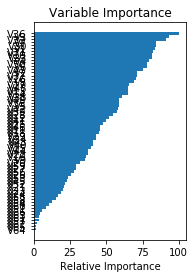

In [71]:
# #############################################################################
# Plot feature importance
feature_importance = classifier.feature_importances_
## make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, dataset.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [72]:
sorted_idx
# feature_importance[sorted_idx]
# feature_importance[sorted_idx[64]]
# feature_importance[sorted_idx[65]]


array([63, 64, 61, 56, 60, 62, 65, 50, 59, 53, 57, 54, 23, 22, 20, 51, 44,
       52, 25, 55, 26, 58, 19,  8, 18, 21, 43, 14, 39, 42, 33, 28, 17, 10,
       45, 24, 40, 11, 27, 38, 41,  4, 34, 48, 37, 13, 12, 47, 16,  7, 15,
       36,  1, 46,  5, 49,  3, 32,  9, 30,  0, 29,  6, 31,  2, 35],
      dtype=int64)

In [73]:
from sklearn.metrics import f1_score
# f1_score(y_test, y_pred, average='macro')  
# f1_score(y_test, y_pred, average='micro')  
# f1_score(y_test, y_pred, average='weighted')  
f1_score(y_test, y_pred, average=None)

array([0.5       , 0.81669151, 0.44444444, 0.91680815])